# Lab-4:
In this lab, we will examine some classifiers and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. Lasso and Ridge
2. Naïve Bayes
3. KNN
4. Cross Validation

---
## Lasso and Ridge
Both models are the regularized forms of the linear regression.
Lasso with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coeffeicients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
2. When to use Ridge?
3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?

### Loading Boston dataset
Housing-Prices Values in Suburbs of Boston.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

X, y = load_boston(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)


### Fitting both Lasso and Ridge
Task:

Fit two models: Lasso and Ridge -with the default alpha-.
Then print their coefficients and notice the difference.

In [3]:
from sklearn.linear_model import Lasso, Ridge
clf = Lasso()
clf.fit(x_train,y_train)
print('Lasso:')
print(clf.coef_)
clf = Ridge()
print('Ridge:')
clf.fit(x_train,y_train)
print(clf.coef_)
print(x_train)


Lasso:
[-6.29657633e-02  3.50956640e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.26979134e+00  6.77955847e-04 -6.45065773e-01
  1.93545727e-01 -1.35087027e-02 -6.45345873e-01  4.49042185e-03
 -6.73150676e-01]
Ridge:
[-1.11057981e-01  3.65852805e-02  4.69212854e-02  6.03824135e-01
 -6.97460565e+00  5.11864285e+00 -2.69870227e-02 -1.22824280e+00
  2.49139807e-01 -1.39899765e-02 -8.47813312e-01  6.95422088e-03
 -4.68816487e-01]
[[3.32105e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.96900e+02
  2.68200e+01]
 [1.91330e-01 2.20000e+01 5.86000e+00 ... 1.91000e+01 3.89130e+02
  1.84600e+01]
 [1.91860e-01 0.00000e+00 7.38000e+00 ... 1.96000e+01 3.93680e+02
  5.08000e+00]
 ...
 [4.26131e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.90740e+02
  1.26700e+01]
 [1.00840e-01 0.00000e+00 1.00100e+01 ... 1.78000e+01 3.95590e+02
  1.01600e+01]
 [1.83370e-01 0.00000e+00 2.77400e+01 ... 2.01000e+01 3.44050e+02
  2.39700e+01]]


Task:
Let's try different values for alpha for Lasso regressor and plot the validation loss.

(8, 1) (8,)


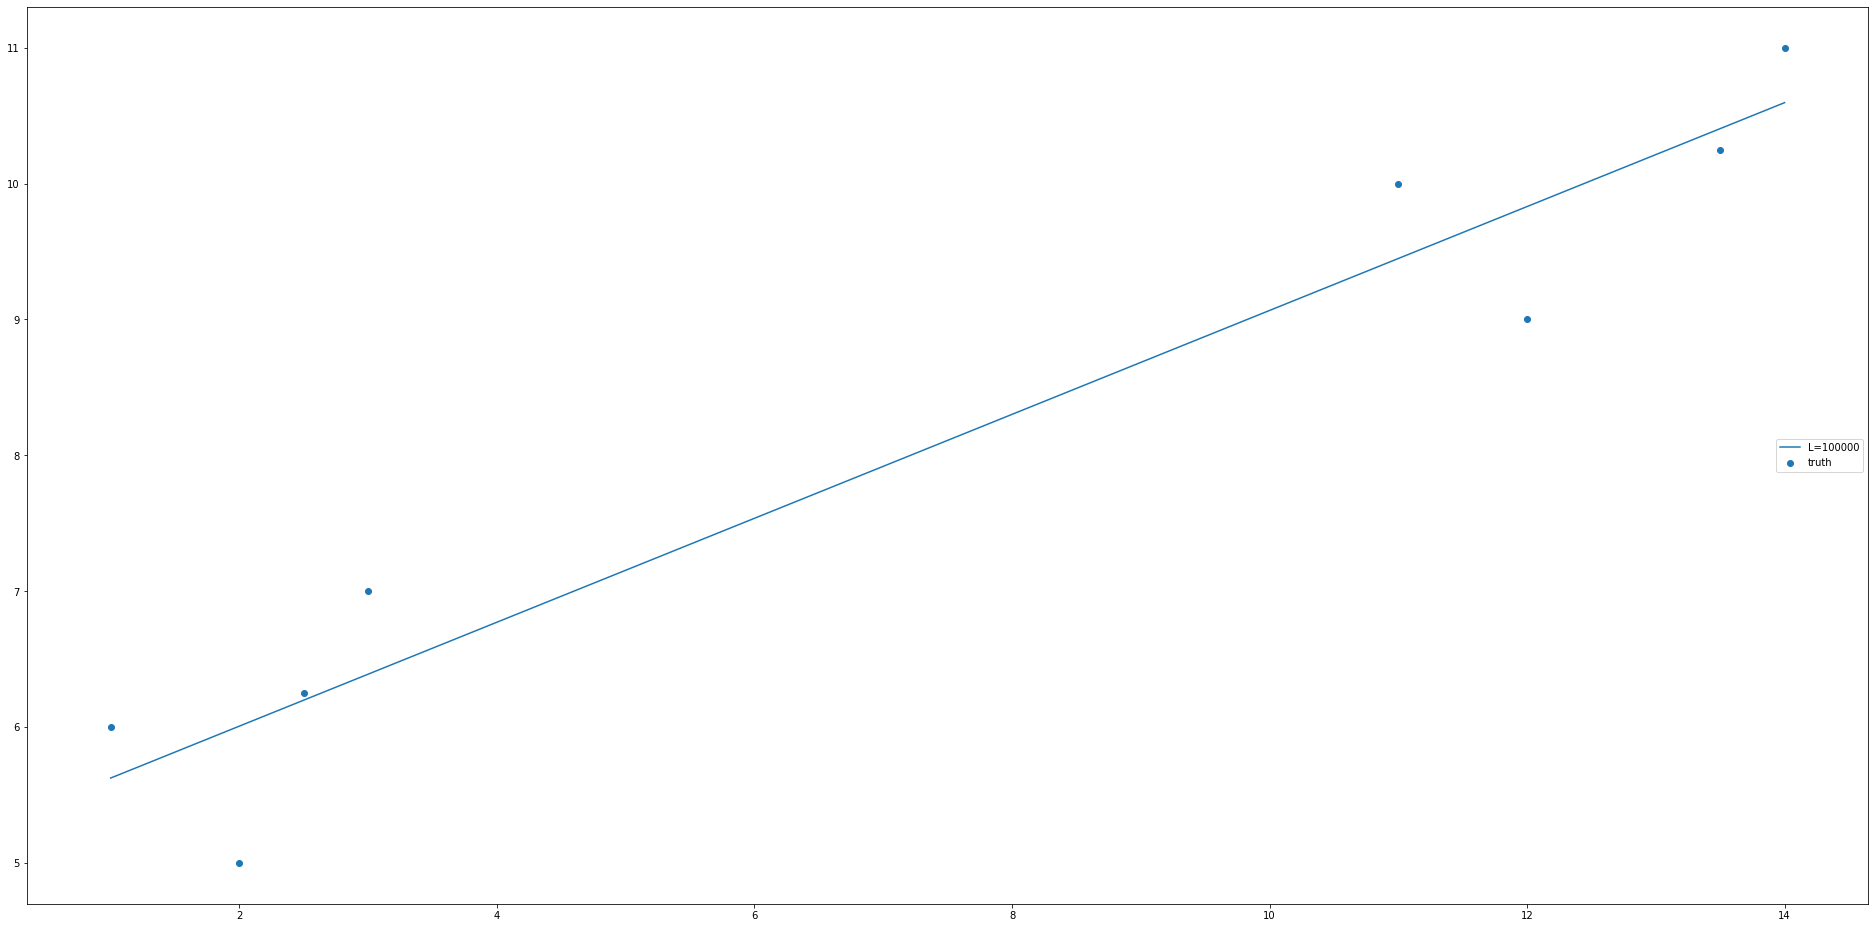

In [64]:
import matplotlib.pylab as plt
import numpy as np

from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = np.arange(start=100000,stop=100001,step=100)
losses = []
x_train=np.array([[1],[2],[2.5],[3],[11],[12],[13.5],[14]])
y_train=np.array([6,5,6.25,7,10,9,10.25,11])
print(x_train.shape,y_train.shape)
# from sklearn.linear_model import Ridge
# import numpy as np
n_samples, n_features = 8, 1
# rng = np.random.RandomState(0)
# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
# print(X)
# clf = Ridge(alpha=1.0)
# clf.fit(X, y)
# print(X.shape,y.shape)
fig, ax = plt.subplots()
fig.set_size_inches(h=16.5, w=33)
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    clf=Ridge(alpha=0.00001)
    clf.fit(x_train,y_train)
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    # print( alpha, [clf.coef_,5.242884510125889])
    losses.append( [clf.coef_,5.242884510125889])
    plt.plot([min(x_train),max(x_train)], [min(x_train)*clf.coef_+clf.intercept_, max(x_train)*clf.coef_+clf.intercept_],label='L={0}'.format(alpha))
    # print(alpha, clf.coef_,clf.intercept_)]
    break

ax.scatter(x_train, y_train,label='truth')
ax.legend(loc='right')
# ax.set_xlabel("alpha")
# ax.set_ylabel("Mean squared error")

# best_alpha = alphas[np.argmin(losses)] # argmin -> index of the np.minimum value
# print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [ ]:
ridge = Ridge(best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 29.953471268761525


## Loading the iris dataset
Dataset of 3 types/classes of flowers with 4 features. Suitable for classification!

In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.

## Naïve Bayes
We will use the Gaussian Naïve Bayes, that deals -as a assumption- with the continous features as gaussian variables to compute their probability.

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$$

While $\mu_y$ and $\sigma_y^2$ are the mean and the variance of the feature $i$ for class $y$.

Note: The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$.

___
What are the pros and cons of Naive bayes classifier?
___

Let's train a naive-bayes model and check the test accuracy.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()





gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7861111111111111


## K nearest neighbour classifier
1. What are the pros and cons of KNN?

2. To decrease the variance of KNN model, should we increase or decrease the K?

___
Let's do the same with KNN classifier.


Rescale the features first.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.975


Task: Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

___
## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

Note: that's why we didn't make a validation set.

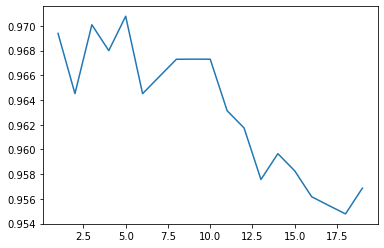

[0.9693819559554819, 0.9645140556814722, 0.9700822029024728, 0.9679916105679781, 0.9707723013429856, 0.9645072900104869, 0.965904401068976, 0.9672913636209871, 0.9673015121274652, 0.9672947464564797, 0.9631270931294612, 0.9617367477419573, 0.9575623287439532, 0.959652921078448, 0.9582591928554515, 0.9561652176854639, 0.9554683535739656, 0.9547782551334529, 0.9568654646324549]
Best K: 5


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    # Write 2 lines of code, one to compute the CV scores.
    # And another to calculate the average.
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn,x_train,y_train,cv=7)
    avg_score = np.mean(scores)
    # Task ends

    cv_scores.append(avg_score)

plt.plot(Ks, cv_scores)
plt.show()
print(cv_scores)
print("Best K:", Ks[np.argmax(cv_scores)])

In KNN classifier, there're several hyperparamters to tune, tuning them one by one is exhaustive approach.
Let's try a better approach called GridSearchCV.


### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html) for help.

Then measure the accuracy on the testset.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Write 2 lines of code to run GridSearchCV with cv=7 to tune the above hyperparams.
param_grid = {
    "n_neighbors":list(range(1,11)),
    "weights":["uniform","distance"],
    "metric":["euclidean","manhattan","chebyshev","cosine"]
}

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),cv=7,param_grid=param_grid)

# Task ends here!

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.969 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.969 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.965 (+/-0.026) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.969 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.970 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.971 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.968 (+/-0.015) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.971 (+/-0.014) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.971 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.971 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.965 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.971 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 